In [503]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from scipy import stats
%matplotlib inline

In [624]:
# replacing string in to binary
df = pd.read_csv('cleaned_data.csv')
df['change_in_meds'] = df['change_in_meds'].replace('Ch', 1)
df['change_in_meds'] = df['change_in_meds'].replace('No', 0)

In [625]:
df['citoglipton'].value_counts()

not_prescribed    99492
Name: citoglipton, dtype: int64

In [626]:
df['metformin_rosiglitazone'].value_counts()

not_prescribed    99492
Name: metformin_rosiglitazone, dtype: int64

In [627]:
df['examide'].value_counts()

not_prescribed    99492
Name: examide, dtype: int64

In [628]:
df['metformin_pioglitazone'].value_counts()

not_prescribed      99491
no_change_dosage        1
Name: metformin_pioglitazone, dtype: int64

In [629]:
df['glimepiride_pioglitazone'].value_counts()

not_prescribed      99491
no_change_dosage        1
Name: glimepiride_pioglitazone, dtype: int64

In [630]:
#drugs that had every value not_prescribed where dropped as every value in binary would be 0
#and would have no significance/ Also dropped meds that had 99.99@ not prescribed
to_drop = ['citoglipton','examide']

df.drop(to_drop, inplace=True, axis=1)

In [631]:
df['glipizide_metformin'].value_counts()

not_prescribed      99479
no_change_dosage       13
Name: glipizide_metformin, dtype: int64

In [632]:
df['acetohexamide'].value_counts()

not_prescribed      99491
no_change_dosage        1
Name: acetohexamide, dtype: int64

In [633]:
df['miglitol'].value_counts()

not_prescribed      99454
no_change_dosage       31
dosage_decreased        5
dosage_increased        2
Name: miglitol, dtype: int64

In [634]:
df['acarbose'].value_counts()

not_prescribed      99190
no_change_dosage      289
dosage_increased       10
dosage_decreased        3
Name: acarbose, dtype: int64

In [635]:
df['chlorpropamide'].value_counts()


not_prescribed      99407
no_change_dosage       78
dosage_increased        6
dosage_decreased        1
Name: chlorpropamide, dtype: int64

In [636]:
df = df.drop(['Unnamed: 0'], axis=1)


In [637]:
df = df.drop(['metformin_rosiglitazone','metformin_pioglitazone', 'glimepiride_pioglitazone', 'acetohexamide' ], axis =1)

In [638]:
# replacing string in to binary
df['diabates_med_prescribed'] = df['diabates_med_prescribed'].replace('No', 0)
df['diabates_med_prescribed'] = df['diabates_med_prescribed'].replace('Yes', 1)
df['gender'] = df['gender'].replace('Male', 0)
df['gender'] = df['gender'].replace('Female', 1)

#replace age code intervals 0- 10: 1, 10-20:2 etc
for i in range (0,10):
    df['age']=df['age'].replace('['+str(10*i)+ '-' +str(10*(i+1))+')', i+1)


In [639]:
#convert string to binary with 0 and 1 only either readmitted or not regardless of days
df['readmitted'] = df['readmitted'].replace('NO', 0)
df['readmitted'] = df['readmitted'].replace('<30', 1)
df['readmitted'] = df['readmitted'].replace('>30', 1)


In [640]:
df['readmitted'].value_counts()

0    53316
1    46176
Name: readmitted, dtype: int64

In [644]:
meds = ['metformin', 'nateglinide', 'chlorpropamide', 'glimepiride',
         'glipizide','repaglinide','glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone',
        'acarbose', 'miglitol', 'troglitazone','tolazamide','insulin',  'glyburide_metformin',
        'glipizide_metformin', 
        ]

for col in meds:
    df[col]=df[col].replace('not_prescribed', 0)
    df[col]=df[col].replace('no_change_dosage', 0)
    df[col]=df[col].replace('dosage_increased', 1)
    df[col]=df[col].replace('dosage_decreased', 1)

In [646]:
column_names1 =['race']
new_values = {'AfricanAmerican': 0, 'Asian':1, 'Caucasian': 3, 'Hispanic': 4, 'Other': 5 }
for medicine in column_names1:
    df[medicine] = df[medicine].replace(new_values)

In [647]:
df.head(5)

,race,gender,age,days_in_hospital,num_lab_procedures,num_not_lab_procedures,num_current_medications,num_outpatient_appointments,num_previous_emergencies,num_inpatient_overnight_stays,...,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide_metformin,glipizide_metformin,change_in_meds,diabates_med_prescribed,readmitted
0,3,1,1,1,41,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,1,2,3,59,0,18,0,0,0,...,0,0,0,0,1,0,0,1,1,1
2,0,1,3,2,11,5,13,2,0,1,...,0,0,0,0,0,0,0,0,1,0
3,3,0,4,2,44,1,16,0,0,0,...,0,0,0,0,1,0,0,1,1,0
4,3,0,5,1,51,0,8,0,0,0,...,0,0,0,0,0,0,0,1,1,0


In [648]:
# train test split
from sklearn.model_selection import train_test_split
X = df.drop('readmitted', axis = 1)
y = df.readmitted
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [649]:
#size of x train
len(X_train)

69644

In [650]:
df.head(5)

,race,gender,age,days_in_hospital,num_lab_procedures,num_not_lab_procedures,num_current_medications,num_outpatient_appointments,num_previous_emergencies,num_inpatient_overnight_stays,...,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide_metformin,glipizide_metformin,change_in_meds,diabates_med_prescribed,readmitted
0,3,1,1,1,41,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,1,2,3,59,0,18,0,0,0,...,0,0,0,0,1,0,0,1,1,1
2,0,1,3,2,11,5,13,2,0,1,...,0,0,0,0,0,0,0,0,1,0
3,3,0,4,2,44,1,16,0,0,0,...,0,0,0,0,1,0,0,1,1,0
4,3,0,5,1,51,0,8,0,0,0,...,0,0,0,0,0,0,0,1,1,0


In [706]:
# builds multiple decision trees to get final outcome. We used 100 decision trees in the end as
#found using less or more didn't improve the accuracy and 100 seemed to be the ideal number
#min_samples_leaf found as 10 to be our ideal number
# max_features in each tree uses 5 features and helps reduces overfitting
# found 7 to be the optimal value
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100,  max_features=5, min_samples_leaf=10 )
rfc.fit(X_train,y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=5,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [707]:
#accuracy of model
rfc.score(X_test,y_test)


0.6227217904047172

In [708]:
ypred = rfc.predict(X_test)

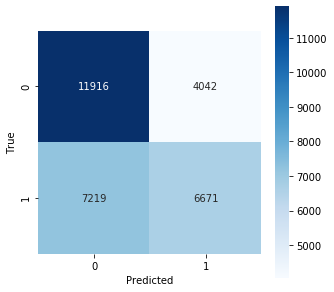

In [709]:
#confusion matrix to vizualize performance of the algorithm
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, ypred)
fig_size = plt.subplots(figsize=(5,5)) 
sns.heatmap(cm, square=True, annot=True,cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True');

In [710]:
#summary of prediction results
from sklearn.metrics import classification_report
rfc_pred= rfc.predict(X_test)
print(confusion_matrix(y_test,rfc_pred))
print('\n')
print(classification_report(y_test,rfc_pred))

[[11916  4042]
 [ 7219  6671]]


              precision    recall  f1-score   support

           0       0.62      0.75      0.68     15958
           1       0.62      0.48      0.54     13890

    accuracy                           0.62     29848
   macro avg       0.62      0.61      0.61     29848
weighted avg       0.62      0.62      0.62     29848



In [711]:
from sklearn.feature_selection import SelectFromModel

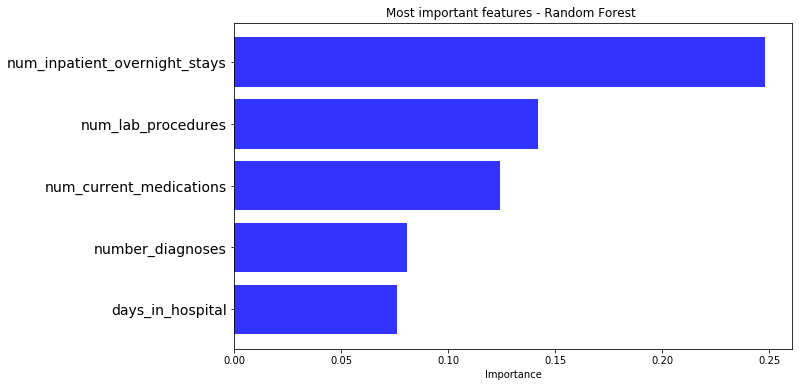

In [712]:
#
feature_names = X_train.columns
feature_imports = rfc.feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"]).nlargest(5, "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)
plt.figure(figsize=(10,6))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8, color = 'b')
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importance')
plt.title('Most important features - Random Forest ')
plt.show()

# code taken from https://www.kaggle.com/iabhishekofficial/prediction-on-hospital-readmission


In [718]:
# predict whether or not patient be readmitted with if 34 features below were entered
# 0 meaning patient will not be readmitted
rfc.predict([[3,1,1,20,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])

array([0])